Colab 환경 설정하기

In [1]:
!pip install gluonnlp pandas tqdm
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=689018 sha256=d215a84d90029461f0caae8c0b2a98bf626e89558967a763d3e18a85aae601c9
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

github에서 KoBERT 파일 로드 및 KoBERT 모델 불러오기

In [2]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-txak5jzs/kobert-tokenizer_e667aba22e4d43d590c12b8e0b8944db
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-txak5jzs/kobert-tokenizer_e667aba22e4d43d590c12b8e0b8944db
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4648 sha256=849bfd5638cb666a007fec2016c674d6faad7bdb24935762e99bf67c6e429d30
  Stored in directory: /tmp/pip-ephem-wheel-cache-uy2bcsao/wheels/f7/cb/29/1a737fe71e5108dc30b04ea4a990f78ed271fa537aaf3fce7c
Successfully built kobert_tokenizer


In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT to /tmp/pip-req-build-grsicckt
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT' /tmp/pip-req-build-grsicckt
  Resolved https://****@github.com/SKTBrain/KoBERT to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 75.3 MB/s eta 

In [4]:
import os
from zipfile import ZipFile
import torch
from transformers import BertModel
import gluonnlp as nlp

from kobert import download, get_tokenizer

def get_kobert_model(model_path, vocab_file, ctx="cpu"):
        bertmodel = BertModel.from_pretrained(model_path, return_dict=False)
        device = torch.device(ctx)
        bertmodel.to(device)
        bertmodel.eval()
        vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(
            vocab_file, padding_token="[PAD]"
        )
        return bertmodel, vocab_b_obj

In [5]:
from kobert_tokenizer import KoBERTTokenizer

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/535 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/369M [00:00<?, ?B/s]

필요한 라이브러리 불러오기

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm,tqdm_notebook
import pandas as pd
import random
import matplotlib.pyplot as plt

# transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

# GPU사용시
device=torch.device('cuda:0')

데이터셋 불러오기

In [35]:
data=pd.read_csv('./Lyrics_knu_kosac.csv',encoding='utf-8')
data

,Lyrics,label,y,knu,kosac,result,pos
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 생각하고 늦은 ...,0,1,0.625000,0.500000,0.562500,1
1,맛있었다 고 했던 살구빛 샐러드 맛있어서 먹고 싶어 좋아했던 것들을 나에게 자그마한...,0,1,0.000000,0.437500,0.218750,0
2,마주치는 눈빛에 아기 아기 왠지 어색해 대체 고개를 숙여봐도 발끝에 맘이 설레 두근...,0,1,0.571429,0.571429,0.571429,1
3,어깨동무까진 괜찮아 치마 손잡는 건 위험해 잘 자란 메세 진 괜찮아그래도 자냐는 메...,0,1,0.700000,0.416667,0.558333,1
4,햇살이 가득 그댈 향한 가벼운 발걸음 콧노래 부르며 쇼윈도에 비친 모습을 한번 점검...,0,1,0.857143,0.545455,0.701299,1
...,...,...,...,...,...,...,...
741,반쯤 미쳐가는 망가져 삶넌 내게서 지워가고 부숴버려라 추락한 눈앞에서 멀어지는 속도...,3,0,0.600000,0.476190,0.538095,1
742,무궁화 꽃이 피었습니다 빼고 멈춰지담 꽃이 피었습니다 현아 빼고 비켜 도망가 너나 ...,3,0,0.571429,0.384615,0.478022,0
743,아예 아예 아예 이렇게 감을 못 잡는 말을 하는지 모르겠어 뭐야 싱긋싱긋 웃으며 치...,3,0,0.750000,0.750000,0.750000,1
744,나쁜 계집애 나난 나쁜 계집애 나쁜 계집애 모든 여자가 고난 나난 모든 여자가 곳 ...,3,0,0.555556,0.666667,0.611111,1


In [36]:
pos=data[data['pos']==1].reset_index(drop=True)
a=pos[pos['label']==0]
b=pos[pos['label']==2]
df=pd.concat([a,b])

In [37]:
def new_label(df):
  if df['label']==0:
    return '0' #행복
  else:
    return '1' #응원

In [38]:
df['Label']=df.apply(new_label,axis=1)
df.drop(['y','result','pos','label','knu','kosac'],axis=1,inplace=True)
df

,Lyrics,Label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 생각하고 늦은 ...,0
1,마주치는 눈빛에 아기 아기 왠지 어색해 대체 고개를 숙여봐도 발끝에 맘이 설레 두근...,0
2,어깨동무까진 괜찮아 치마 손잡는 건 위험해 잘 자란 메세 진 괜찮아그래도 자냐는 메...,0
3,햇살이 가득 그댈 향한 가벼운 발걸음 콧노래 부르며 쇼윈도에 비친 모습을 한번 점검...,0
4,세상에서 가장 행복한 말 더욱 듣고픈 말 고마운 말 살리는 사랑해 그댈 쑥스러워 평...,0
...,...,...
220,여느 때완 달리 쳐져 어깨 위에 세상 모든 근심 짊어진 우울해 보여 늘 사람들의 고...,1
221,힘 고등학교 에너지 맑은 땀방울로 세상의 비교와 전혀 무관한 힘 꿈 시너지를 강조하...,1
222,이야기들 속에 가장 밝게 빛났던 순간 하루는 매일 빠르게 지나가 버렸고 것도 내겐 ...,1
223,이런저런 이유에 완성된 틀 속에 갇혀 있던 자유를 몰랐어 꼭 묶여 맘을 풀어야겠어 ...,1


In [39]:
# 랜덤한 순서
random.seed(111)
result=[]
for lyric in df['Lyrics']:
    sub=lyric.split(' ')
    result.append(random.sample(sub,len(sub)))
    
lyrics=[]
for word_lst in result:
    sub=' '.join(word_lst)
    lyrics.append(sub)
len(lyrics)

225

In [40]:
label=df['Label'].tolist()
plus=pd.DataFrame({'Lyrics':lyrics,'Label':label})
plus

,Lyrics,Label
0,울어도 가장 보고 짓게 숫자 지쳐 하고 맘은 속 줄일게 나날들이 오늘 이만 우연히 ...,0
1,두근대네 두근대 쪽 살짝 서면 들어 두 같아 멈춰 것만 하시겠습니까 생기길 오늘은 ...,0
2,돼가끔 같은데 건 좋아요 넘어와 어쩌지 메세 넘어와 진 하기엔 같아 둘만 잔은 감고...,0
3,가볼까 오늘 저기에 기분 모습을 오늘은 어쩌면 볼까 좋은 팔짱을 기분이 들지 눈앞에...,0
4,냈지 소중한 감추는 그대 소중한 알아줘 언제나 하고픈 않아도 별다른 핑계 해이 진심...,0
...,...,...
220,아끼는 않는 감당하기 언제든지 있다면 고민을 웃어넘겨 되겠니 차례야 털어놔 않는 호...,1
221,아름답습니다 현실의 힘 자체로 이미지 믿을게 웃어 벽을 무관한 꿈 맘껏 감각 투명한...,1
222,하늘로 밤 사라진 빼곡히 마주할 너는 들려오던 그때의 어둠 매일 있게 이야기들 벌써...,1
223,것을 해낼 해낼 풀어야겠어 하는지 아니에요 멈출 보여줄게 있는지 마 날린 맘을 그들...,1


In [41]:
# 순서 거꾸로

result=[]
for lyric in df['Lyrics']:
    sub=lyric.split(' ')
    result.append(list(reversed(sub)))

lyrics=[]
for word_lst in result:
    sub=' '.join(word_lst)
    lyrics.append(sub)

In [42]:
label=df['Label'].tolist()
plus2=pd.DataFrame({'Lyrics':lyrics,'Label':label})
plus2

,Lyrics,Label
0,안녕 줄일게 이만 사람 싶은 보고 숫자 기억해줘 같아 곁에 감으니 눈을 싶어 빠지고...,0
1,볼래 기도해 이뤄지길 오늘은 가슴속비밀 간직했던 수줍게 같아 오를 마음도 당신을 날...,0
2,볼까 다가가 감고 눈 뻘쭘해지면 어쩌지 어색해지면 소녀 소년 봐넘어와 위에 같은데 ...,0
3,좋은 눈앞에 흔드네요 손을 향해 보이네요 그녀가 저기에 가볼까 어딜 나눌까 얘기를 ...,0
4,알아줘 맘을 기쁜 그대 있어줘 살지만 잊고 깜빡 있어서 곁에 소중한 누구보다 세상 ...,0
...,...,...
220,않아 않아 어울리지 너완 싫어 사람들에게 아끼는 기대 어깰 버리고 털어 호호 말해줘...,1
221,감각이다 자체로 버리지는 뿐 믿을 맘껏 아름답습니다 아름다워 아름다워 충분히 이미 ...,1
222,영원한 있던 곁에 언제나 수놓던 별빛을 빼곡히 소리가 작은 들려오던 귓가에 멀리 찾...,1
223,가서 그냥 보여줄게 해낼 모든 만들어냅니다 규칙을 인생은 그것 좋아합니다 해야 무엇...,1


In [43]:
df=pd.concat([df,plus,plus2])
df

,Lyrics,Label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 생각하고 늦은 ...,0
1,마주치는 눈빛에 아기 아기 왠지 어색해 대체 고개를 숙여봐도 발끝에 맘이 설레 두근...,0
2,어깨동무까진 괜찮아 치마 손잡는 건 위험해 잘 자란 메세 진 괜찮아그래도 자냐는 메...,0
3,햇살이 가득 그댈 향한 가벼운 발걸음 콧노래 부르며 쇼윈도에 비친 모습을 한번 점검...,0
4,세상에서 가장 행복한 말 더욱 듣고픈 말 고마운 말 살리는 사랑해 그댈 쑥스러워 평...,0
...,...,...
220,않아 않아 어울리지 너완 싫어 사람들에게 아끼는 기대 어깰 버리고 털어 호호 말해줘...,1
221,감각이다 자체로 버리지는 뿐 믿을 맘껏 아름답습니다 아름다워 아름다워 충분히 이미 ...,1
222,영원한 있던 곁에 언제나 수놓던 별빛을 빼곡히 소리가 작은 들려오던 귓가에 멀리 찾...,1
223,가서 그냥 보여줄게 해낼 모든 만들어냅니다 규칙을 인생은 그것 좋아합니다 해야 무엇...,1


In [44]:
from sklearn.model_selection import train_test_split

Train,Test=train_test_split(df,test_size=0.2,shuffle=True,random_state=111,stratify=df['Label'])
print(Train.shape,Test.shape)

(540, 2) (135, 2)


In [45]:
dataset_train=[]
for lyric,label in zip(Train['Lyrics'],Train['Label']):
  data=[]
  data.append(lyric)
  data.append(str(label))
  dataset_train.append(data)
                       
dataset_test=[]
for lyric,label in zip(Test['Lyrics'],Test['Label']):
  data=[]
  data.append(lyric)
  data.append(str(label))
  dataset_test.append(data)

입력 데이터셋을 토큰화 하기

In [46]:
# Setting parameters
max_len=64
batch_size=32
warmup_ratio=0.1
num_epochs=10
max_grad_norm=1
log_interval=200
learning_rate=5e-5

In [47]:
class BERTDataset(Dataset):
  
  def __init__(self,dataset,sent_idx,label_idx,bert_tokenizer,vocab,max_len,pad,pair):
    transform=nlp.data.BERTSentenceTransform(bert_tokenizer,max_seq_length=max_len,vocab=vocab,pad=pad,pair=pair)
    self.sentences=[transform([i[sent_idx]]) for i in dataset]
    self.labels=[np.int32(i[label_idx]) for i in dataset]

  def __getitem__(self,i):
    return (self.sentences[i]+(self.labels[i],))

  def __len__(self):
    return (len(self.labels))

In [48]:
tok=tokenizer.tokenize
data_train=BERTDataset(dataset_train,0,1,tok,vocab,max_len,True,False)
data_test=BERTDataset(dataset_test,0,1,tok,vocab,max_len,True,False)

In [49]:
data_train[0]

(array([   2, 3504, 2670, 7843, 3060, 7186, 3524, 6122, 5439,  755,  745,
        4451, 7010, 4688, 1356, 7096, 3854, 7173, 6797, 2812, 1815, 7321,
        1356, 4955, 5330, 7010, 5850, 5211, 5609, 4698, 6973, 6003, 3544,
        2056, 5468, 4299, 7095, 2059, 1562, 6113, 5400, 5196, 6116,  517,
        7796, 7088,  755, 6615, 6896, 2919, 5422, 5842, 4886, 6115, 1356,
        7088, 4837, 4164, 6150, 5214, 1434, 7303, 2864,    3], dtype=int32),
 array(64, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [50]:
train_dataloader=torch.utils.data.DataLoader(data_train,batch_size=batch_size,num_workers=5)
test_dataloader=torch.utils.data.DataLoader(data_test,batch_size=batch_size,num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


KoBERT 모델 구현하기

In [51]:
class BERTClassifier(nn.Module):
  def __init__(self,bert,hidden_size=768,num_classes=2,dr_rate=None,params=None):
    super(BERTClassifier,self).__init__()
    self.bert=bert
    self.dr_rate=dr_rate

    self.classifier=nn.Linear(hidden_size,num_classes)
    if dr_rate:
      self.dropout=nn.Dropout(p=dr_rate)

  def gen_attention_mask(self,token_ids,valid_length):
    attention_mask=torch.zeros_like(token_ids)
    for i,v in enumerate(valid_length):
      attention_mask[i][:v]=1
    return attention_mask
  
  def forward(self,token_ids,valid_length,segment_ids):
    attention_mask=self.gen_attention_mask(token_ids,valid_length)
    _,pooler=self.bert(input_ids=token_ids,token_type_ids=segment_ids.long().cuda(),
                       attention_mask=attention_mask.float().to(token_ids.device),return_dict=False)
    if self.dr_rate:
      out=self.dropout(pooler)
    return self.classifier(out)

In [52]:
random.seed(111)

# BERT 모델 불러오기
model=BERTClassifier(bertmodel,dr_rate=0.9).to(device)

# optimizer와 schedule 설정
no_decay=['bias','LayerNorm.weight']
optimizer_grouped_parameters=[
    {'params':[p for n,p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay':0.01},
    {'params':[p for n,p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay':0.0}
]

optimizer=AdamW(optimizer_grouped_parameters,lr=learning_rate)
loss_fn=nn.CrossEntropyLoss()

t_total=len(train_dataloader)*num_epochs
warmup_step=int(t_total*warmup_ratio)

scheduler=get_cosine_schedule_with_warmup(optimizer,num_warmup_steps=warmup_step,num_training_steps=t_total)

# 정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
  max_vals,max_indices=torch.max(X,1)
  train_acc=(max_indices==Y).sum().data.cpu().numpy()/max_indices.size()[0]
  return train_acc

train_dataloader

train

In [53]:
random.seed(111)

train_history=[]
test_history=[]
loss_history=[]
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    #train_history.append(train_acc / (batch_id+1))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))

<ipython-input-53-aa10d7dcc171>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.875537633895874 train acc 0.4375
epoch 1 train acc 0.5832457983193278


<ipython-input-53-aa10d7dcc171>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 test acc 0.8428571428571429


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.48981454968452454 train acc 0.84375
epoch 2 train acc 0.8398109243697478


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 test acc 0.8651785714285714


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.22861585021018982 train acc 0.90625
epoch 3 train acc 0.9051995798319328


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 test acc 0.8651785714285714


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.11232652515172958 train acc 0.96875
epoch 4 train acc 0.9503676470588235


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 test acc 0.9089285714285713


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.03673398867249489 train acc 1.0
epoch 5 train acc 0.9648109243697479


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 test acc 0.8964285714285714


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.01999001018702984 train acc 1.0
epoch 6 train acc 0.9871323529411765


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 test acc 0.9214285714285714


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.01018571574240923 train acc 1.0
epoch 7 train acc 0.9871323529411765


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 test acc 0.9089285714285713


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.008200420998036861 train acc 1.0
epoch 8 train acc 0.9908088235294118


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 test acc 0.9026785714285713


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.010856831446290016 train acc 1.0
epoch 9 train acc 0.9981617647058824


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 test acc 0.9089285714285713


  0%|          | 0/17 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.0068569243885576725 train acc 1.0
epoch 10 train acc 0.9981617647058824


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 test acc 0.9151785714285714


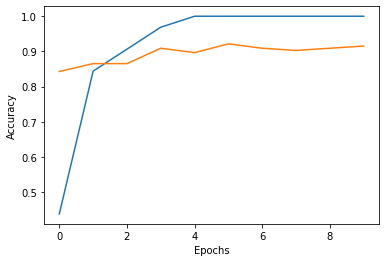

In [54]:
plt.plot(train_history)
plt.plot(test_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

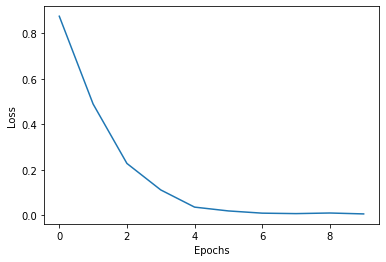

In [55]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [56]:
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            #print(logits)

            if np.argmax(logits) == 0:
                test_eval.append("행복")
            elif np.argmax(logits) == 1:
                test_eval.append("응원")
        return test_eval[0]

        #print(">> 입력하신 내용에서 " + test_eval[0] + "이 느껴집니다.")

In [57]:
top30=pd.read_csv('./top30_dict.csv',encoding='utf-8')
top30

,singer,title,lyrics,knu,kosac,result,pos
0,NewJeans,Ditto,우스 테이에서 미들 수수께끼를 원하지 않습니다 말해줘 백로라고 말하면 하고 말합니다...,0.500000,0.692308,0.596154,1
1,NewJeans,OMG,노래는 그것 당신에 대해 아이비 만만 힘들 때울 같을 기운도 나지 않을 그것 걱정하...,0.333333,0.437500,0.385417,0
2,NewJeans,Hype boy,아기 미쳤다 빠져버리는 은 당신을 느끼게 했습니다 너도 말해줄래 누가 뭐라 든 남들...,0.666667,0.500000,0.583333,1
3,태양,VIBE (feat. Jimin of BTS),말론 표현할 수 없지만 소녀 분위기를 가지고 있다는 것을 알아야 합니다에 미소는 미...,0.642857,0.562500,0.602679,1
4,윤하 (YOUNHA),사건의 지평선,생각이 많은 건 말이야 당연히 해야 할 일이야 나에겐 우리가 순위야 안전한 유리병을...,0.666667,0.357143,0.511905,1
5,투모로우바이투게더,Sugar Rush Ride,생각은 숨을 멈췄어 돌아올 다짐 따윈 한순간 풀어 헤쳐져 네겐 가까이 오라 속삭여 ...,0.125000,0.615385,0.370192,0
6,부석순 (SEVENTEEN),파이팅 해야지 (Feat. 이영지),파이팅 해야지 파이팅 아뿔싸 일어나야지 아침인데 눈 감았다 뜨니 해가 중천인데 아침...,0.230769,0.454545,0.342657,0
7,LE SSERAFIM (르세라핌),ANTIFRAGILE,가시밭길 위로 라이딩은 향상시켰다 거짓으로 가득 찬 파티 가렵지도 않아내 뒤에 말들...,0.461538,0.315789,0.388664,0
8,NewJeans,Attention,너와 맘이 보이지 한참을 쳐다봐 가까이 다가가 볼 수 있습니다 상용기가 생겼지 이미...,0.833333,0.437500,0.635417,1
9,임영웅,사랑은 늘 도망가,눈물이 난다 길을 걸으면 사람 손길이 생각이 난다 붙잡지 못하고 가슴만 떨었지 아름...,0.444444,0.473684,0.459064,0


In [58]:
top30['predict']='0'
for idx,lyric in enumerate(top30['lyrics']):
  top30['predict'][idx]=predict(lyric)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-58-48ef4f386174>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30['predict'][idx]=predict(lyric)


In [59]:
top30.to_csv('./top30_pred_pos.csv',encoding='utf-8',index=False)

In [60]:
top30[top30['pos']==1]

,singer,title,lyrics,knu,kosac,result,pos,predict
0,NewJeans,Ditto,우스 테이에서 미들 수수께끼를 원하지 않습니다 말해줘 백로라고 말하면 하고 말합니다...,0.500000,0.692308,0.596154,1,행복
2,NewJeans,Hype boy,아기 미쳤다 빠져버리는 은 당신을 느끼게 했습니다 너도 말해줄래 누가 뭐라 든 남들...,0.666667,0.500000,0.583333,1,행복
3,태양,VIBE (feat. Jimin of BTS),말론 표현할 수 없지만 소녀 분위기를 가지고 있다는 것을 알아야 합니다에 미소는 미...,0.642857,0.562500,0.602679,1,행복
4,윤하 (YOUNHA),사건의 지평선,생각이 많은 건 말이야 당연히 해야 할 일이야 나에겐 우리가 순위야 안전한 유리병을...,0.666667,0.357143,0.511905,1,행복
8,NewJeans,Attention,너와 맘이 보이지 한참을 쳐다봐 가까이 다가가 볼 수 있습니다 상용기가 생겼지 이미...,0.833333,0.437500,0.635417,1,응원
10,IVE (아이브),After LIKE,모르지 마음이 날씨처럼 바뀔지 나조차 알 수 없으니 그게 뭐가 중요하니 네게 완전히...,0.777778,0.400000,0.588889,1,행복
11,부석순 (SEVENTEEN),7시에 들어줘 (Feat. Peder Elias),알려줘 오늘 찌뿌둥했던 아침부터 만 원에 놓친 릉 타야만 했었던 러시 워너의 표정 ...,0.375000,0.666667,0.520833,1,응원
13,임영웅,London Boy,꿈에 그리던 그곳 푸른 바다 위로 닮은 하늘 런던에서 런던에서 드넓은 공원 안에 담...,0.666667,0.428571,0.547619,1,행복
14,부석순 (SEVENTEEN),LUNCH,지구 별다른 우주 상관없어 타임라인 속에 평행하게 있다면 가능할 같아 점심 딜리버리...,0.750000,0.500000,0.625000,1,행복
15,임영웅,Polaroid,별들이 짙던 밤 하늘에 약속한 고백 아직도 맘에 당연하듯 남아 있어요 어제 일같이 ...,0.750000,0.533333,0.641667,1,행복
